<center><font size = 8><b>Digital Image Processing</b></font></center><br\><br\>
<center><font size = 6><b>Assignment 2: Morphological Image Processing</b></font></center>

### Name:Sara Hany Mohamed Abdelhady
### ID:2100357
### Email:2100357@eng.asu.edu.eg

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = [15.,10.]

%matplotlib inline

### Question 11
Propose a pipeline to replace the morning background of the left image with the
night background of the right image.
<img src="Q11.PNG" alt="drawing" width="700"/>

(675, 900)


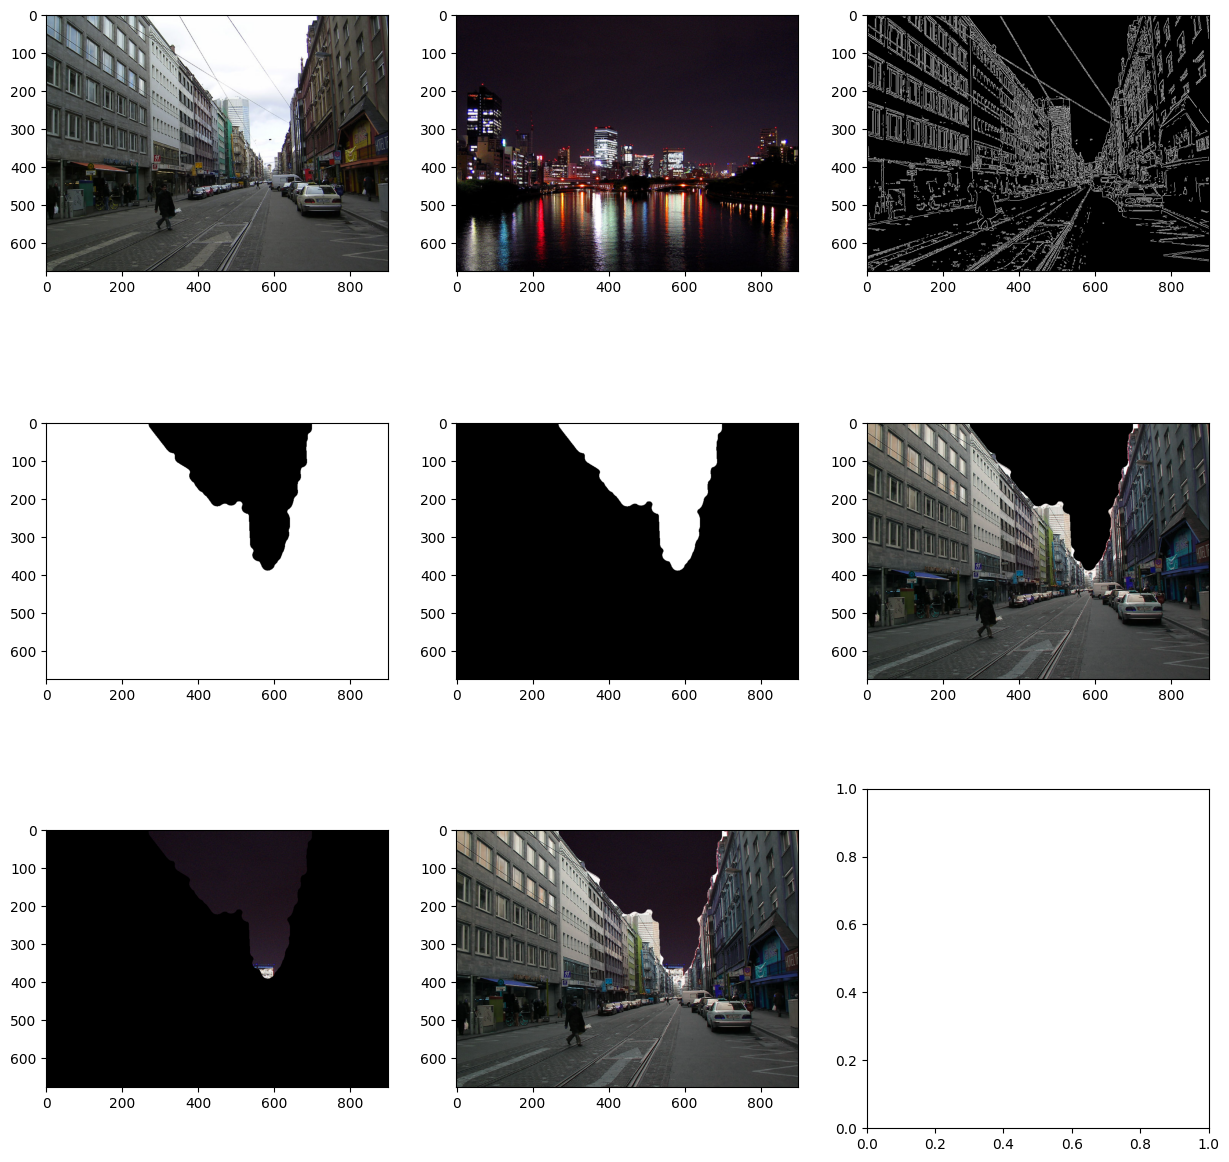

In [280]:
# TODO: Read the morning and evening images
morning_image = cv2.imread("morning.jpg", cv2.IMREAD_COLOR)
evening_image = cv2.imread("evening.jpg", cv2.IMREAD_COLOR)

plt.subplots(3, 3, figsize=(15, 15))
plt.subplot(3,3,1)
plt.imshow(morning_rgb_image)
plt.subplot(3,3,2)
plt.imshow(evening_rgb_image)
# TODO: Replace the morning background with the evening background
evening_image = cv2.resize(evening_image, (morning_image.shape[1], morning_image.shape[0]))
morning_gray_image = cv2.cvtColor(morning_image, cv2.COLOR_BGR2GRAY)
morning_binary_image = cv2.Canny(morning_gray_image,threshold1=100,threshold2=120, apertureSize=3, L2gradient=False)
plt.subplot(3,3,3)
plt.imshow(morning_binary_image, cmap='gray')
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
print(morning_binary_image.shape)
morning_binary_image = cv2.morphologyEx(morning_binary_image, cv2.MORPH_CLOSE, kernel) 
morning_binary_image = cv2.morphologyEx(morning_binary_image, cv2.MORPH_OPEN, kernel) 
morning_binary_image[0:400, 0:270] = 255
morning_binary_image[400:675, 0:900] = 255
morning_binary_image[0:400, 700:900] = 255
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31))
morning_binary_image = cv2.morphologyEx(morning_binary_image, cv2.MORPH_CLOSE, kernel2 )


threshold, morning_binary_image = cv2.threshold(src=morning_binary_image, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
plt.subplot(3,3,4)
plt.imshow(morning_binary_image, cmap='gray')
morning_binary_image = cv2.merge([morning_binary_image] * 3)
inverted_morning_binary_image = cv2.bitwise_not(morning_binary_image)
plt.subplot(3,3,5)
plt.imshow(inverted_morning_binary_image, cmap='gray')

foreground_segmented = cv2.bitwise_and(morning_image, morning_binary_image)
background_segmented = cv2.bitwise_and(evening_image, inverted_morning_binary_image)
result = cv2.add(foreground_segmented, background_segmented)

plt.subplot(3,3,6)
plt.imshow(foreground_segmented)
plt.subplot(3,3,7)
plt.imshow(background_segmented)
plt.subplot(3,3,8)
plt.imshow(result)
# TODO: Display the final image

### Question 12
Design an image processing pipeline for highlighting the
coins available in the following image as shown:
<img src="Q12.PNG" alt="drawing" width="700"/>
<b>Note: </b>Represent both boundaries as circles.

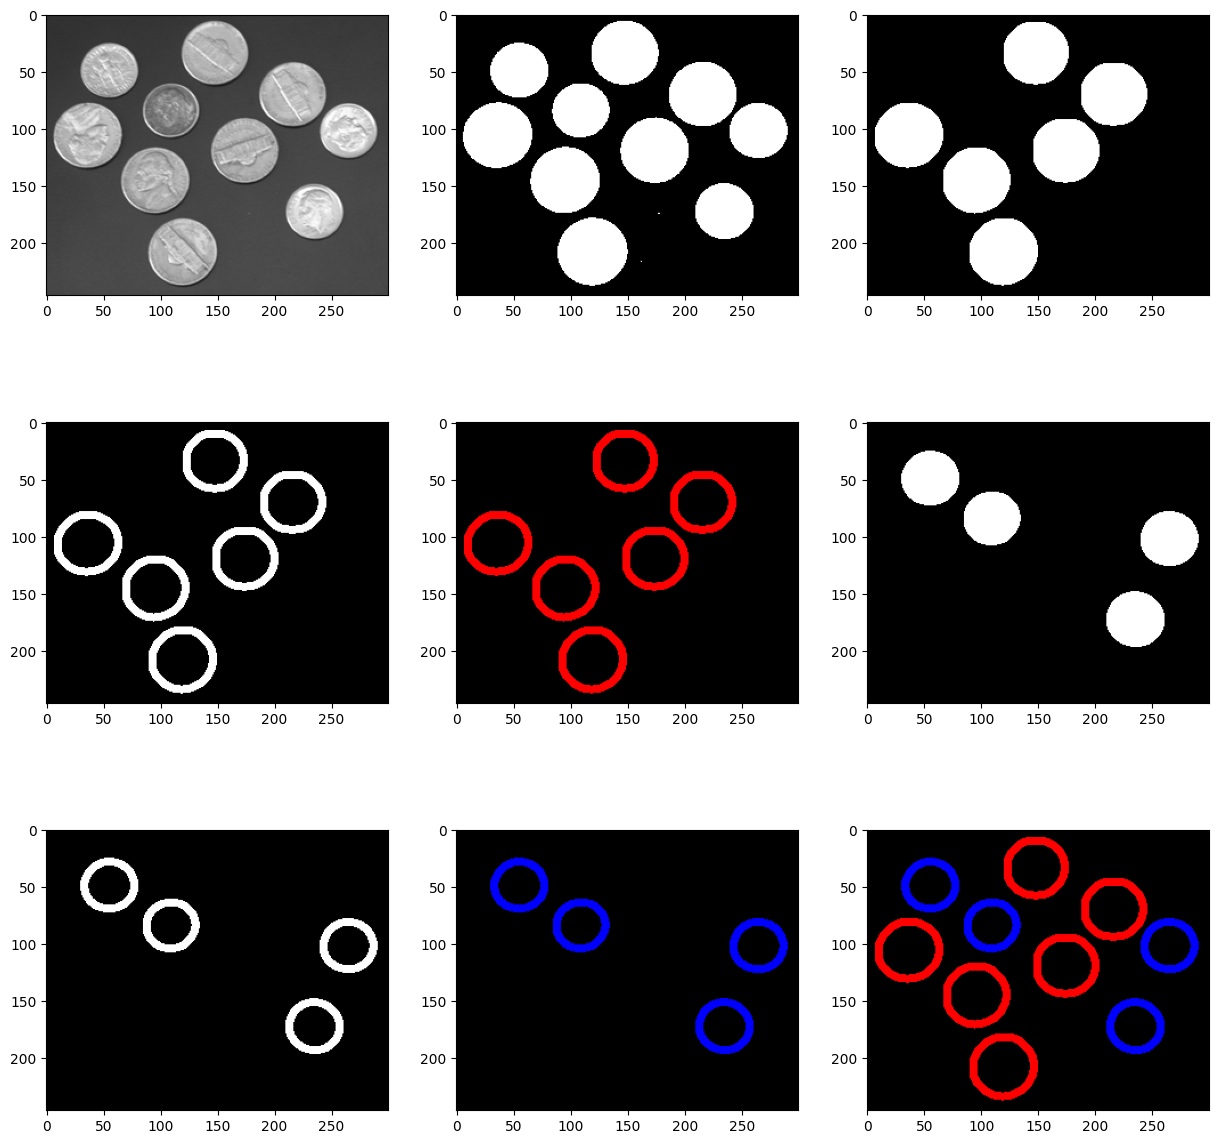

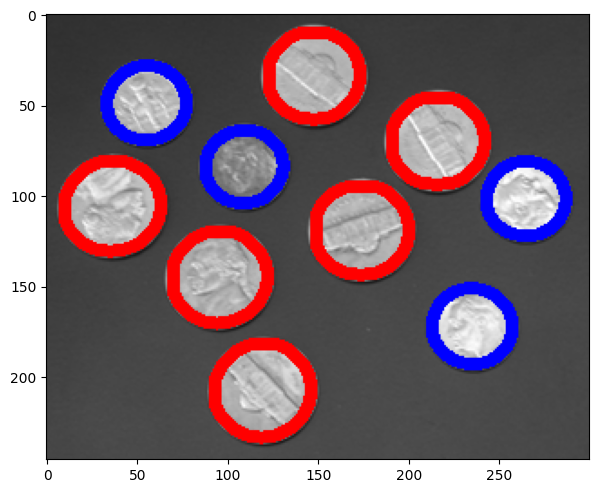

In [170]:
# TODO: Read the coins image
coins_image = cv2.imread("coins.png", cv2.IMREAD_COLOR)
plt.subplots(3, 3, figsize=(15, 15))

threshold, coins_binary_image = cv2.threshold(src=coins_image, thresh=80, maxval=255, type=cv2.THRESH_BINARY)
plt.subplot(3,3,1)
plt.imshow(coins_image)
plt.subplot(3,3,2)
plt.imshow(coins_binary_image)
# TODO: Add red boundary for the large coins and blue boundary for small coins
SE1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
SE2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
big_coins = cv2.morphologyEx(src=coins_binary_image, op=cv2.MORPH_OPEN, kernel=SE1, iterations=1)
plt.subplot(3,3,3)
plt.imshow(big_coins, cmap="gray")
big_coins_boundaries = cv2.erode(src=big_coins,kernel=SE2, iterations=1)
big_coins_boundaries = big_coins - big_coins_boundaries
plt.subplot(3,3,4)
plt.imshow(big_coins_boundaries, cmap="gray")

cv2.imwrite("binary.png", big_coins_boundaries)
big_coins_boundaries = cv2.imread("binary.png", cv2.IMREAD_GRAYSCALE)
red_big_coins_boundaries = cv2.cvtColor(big_coins_boundaries, cv2.COLOR_GRAY2BGR)
coins_image = coins_image - red_big_coins_boundaries
red_big_coins_boundaries[np.where((red_big_coins_boundaries == [255, 255, 255]).all(axis=2))] = [255, 0, 0]
plt.subplot(3,3,5)
plt.imshow(red_big_coins_boundaries)

small_coins = coins_binary_image - big_coins
small_coins = cv2.morphologyEx(src=small_coins, op=cv2.MORPH_OPEN, kernel=SE2, iterations=1)
plt.subplot(3,3,6)
plt.imshow(small_coins, cmap="gray")
small_coins_boundaries = cv2.erode(src=small_coins,kernel=SE2, iterations=1)
small_coins_boundaries = small_coins - small_coins_boundaries
plt.subplot(3,3,7)
plt.imshow(small_coins_boundaries, cmap="gray")
cv2.imwrite("binary.png", small_coins_boundaries)
small_coins_boundaries = cv2.imread("binary.png", cv2.IMREAD_GRAYSCALE)

blue_small_coins_boundaries = cv2.cvtColor(small_coins_boundaries, cv2.COLOR_GRAY2BGR)
coins_image = coins_image - blue_small_coins_boundaries
blue_small_coins_boundaries[np.where((blue_small_coins_boundaries == [255, 255, 255]).all(axis=2))] = [0, 0, 255]

plt.subplot(3,3,8)
plt.imshow(blue_small_coins_boundaries)

# TODO: Display the final image
all_boundaries = blue_small_coins_boundaries + red_big_coins_boundaries 
coins_image[np.where((all_boundaries == [0, 0, 255] ).all(axis=2))] = [0, 0, 255]
coins_image[np.where((all_boundaries == [255, 0, 0] ).all(axis=2))] = [255, 0, 0]
plt.subplot(3,3,9)
plt.imshow(all_boundaries)
plt.subplots(1, 1, figsize=(7, 7))
plt.imshow(coins_image)
